In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
# Ruta de la carpeta que contiene los archivos JSON
carpeta = '../../marca-fantasy-scraper-master/laliga/json_players'
# Lista para almacenar los DataFrames de cada archivo
dataframes = []
# Itera sobre los archivos en la carpeta
for filename in os.listdir(carpeta):
    filepath = os.path.join(carpeta, filename)
    # Verifica si el archivo es un archivo JSON
    if filename.endswith('.json'):
        # Intenta leer el archivo JSON
        with open(filepath, 'r') as file:
            data = json.load(file)

            # Extrae 'position' antes de normalizar
            position = data.get('position', None)
            
            # Normaliza la estructura
            df_temp = pd.json_normalize(data.get('playerStats', {}))

            # Agrega 'position' como columna
            if position is not None:
                df_temp['position'] = position
            
            name = data.get('nickname', None)
            if name is not None:
                df_temp['name'] = name
            # Agrega el DataFrame a la lista
            dataframes.append(df_temp)

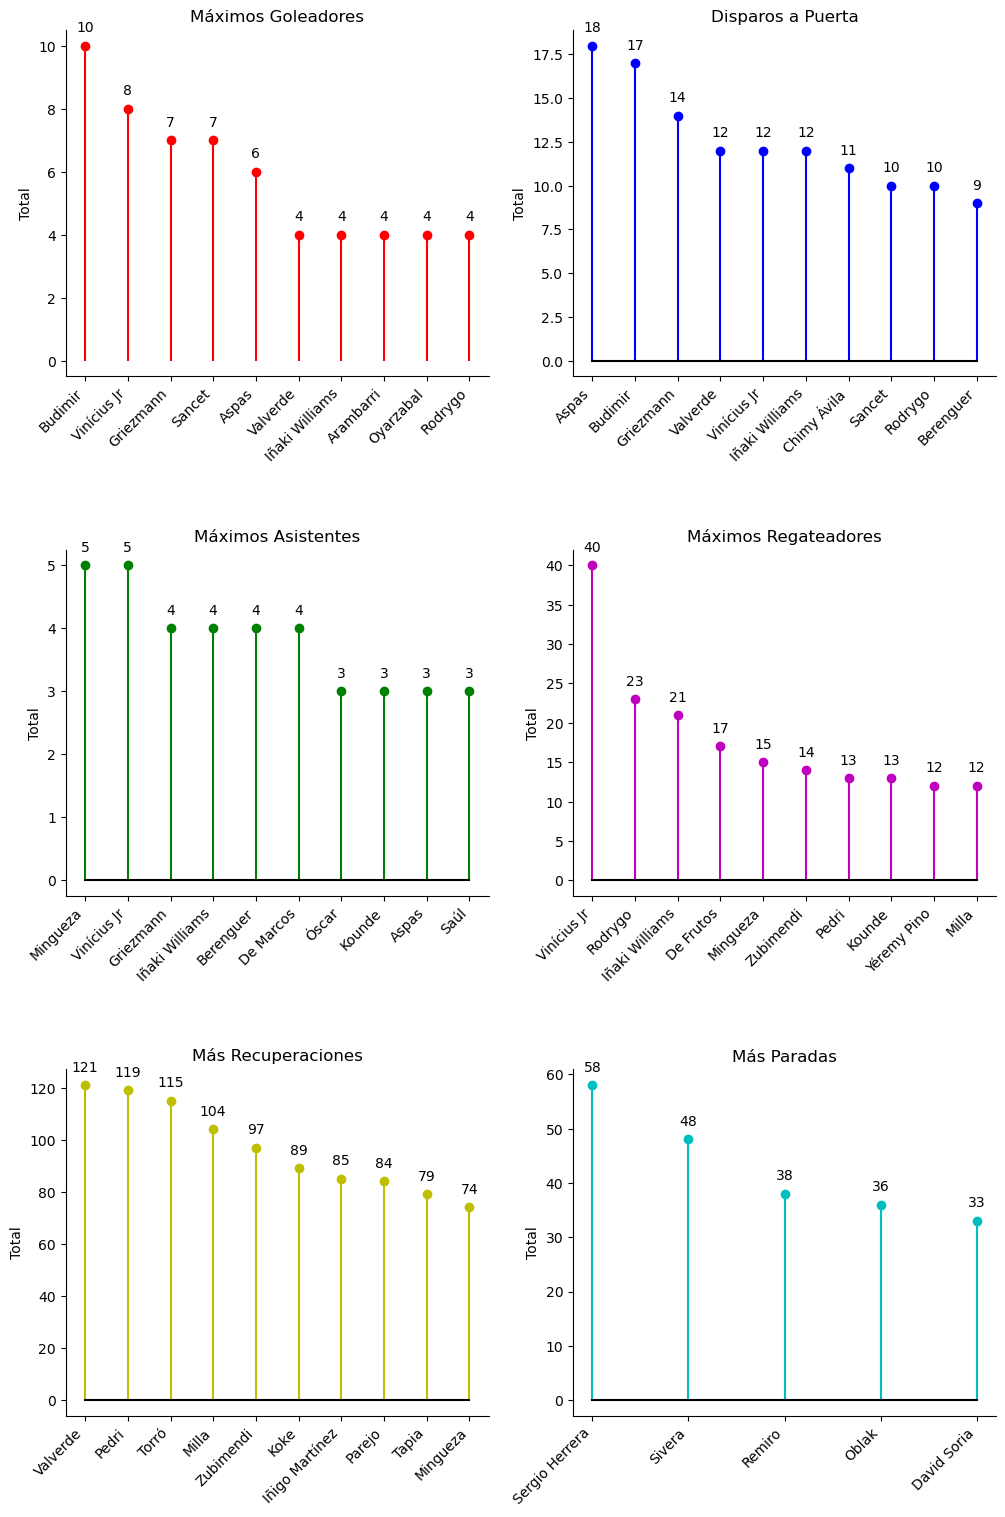

In [2]:
# Verifica si hay algún DataFrame en la lista antes de concatenarlos
if dataframes:
    # Concatena todos los DataFrames en uno solo
    df = pd.concat(dataframes, ignore_index=True)
    
    # Desempaquetar las listas y redondear a números enteros
    metrics_to_round = ['stats.won_contest', 'stats.total_scoring_att', 'stats.goals',
'stats.goal_assist', 'stats.saves', 'stats.ball_recovery']
    for metric in metrics_to_round:
        df[metric] = df[metric].apply(lambda x: round(x[0]) if x else 0)
    
    # Rankings
    top_goleadores = df.groupby('name')['stats.goals'].sum().sort_values(ascending=False).head(10)
    top_disparadores = df.groupby('name')['stats.total_scoring_att'].sum().sort_values(ascending=False).head(10)
    top_asistentes = df.groupby('name')['stats.goal_assist'].sum().sort_values(ascending=False).head(10)
    top_regateadores = df.groupby('name')['stats.won_contest'].sum().sort_values(ascending=False).head(10)
    top_recuperadores = df[df['position'] !=
'Portero'].groupby('name')['stats.ball_recovery'].sum().sort_values(ascending=False).head(10)
    top_paradores = df.groupby('name')['stats.saves'].sum().sort_values(ascending=False).head(5)

    # Configura el gráfico para los máximos goleadores en modo stem
    plt.figure(figsize=(12, 18))
    
    ax1 = plt.subplot(3, 2, 1)
    ax1.stem(top_goleadores.index, top_goleadores.values, linefmt='r-', markerfmt='ro',
basefmt=' ')
    for i, txt in enumerate(top_goleadores.values):
        ax1.annotate(txt, (top_goleadores.index[i], top_goleadores.values[i]),
textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('Máximos Goleadores')
    #plt.xlabel('Jugador')
    plt.ylabel('Total')
    plt.xticks(rotation=45, ha='right')
    # Rotar las etiquetas del eje x
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Configura el gráfico para los máximos disparadores en modo stem
    ax2 = plt.subplot(3, 2, 2)
    ax2.stem(top_disparadores.index, top_disparadores.values, linefmt='b-', markerfmt='bo',
basefmt='k-')
    for i, txt in enumerate(top_disparadores.values):
        ax2.annotate(txt, (top_disparadores.index[i], top_disparadores.values[i]),
textcoords="offset points", xytext=(0,10), ha='center')
    plt.title('Disparos a Puerta')
    #plt.xlabel('Jugador')
    plt.ylabel('Total')
    plt.xticks(rotation=45, ha='right')
    # Rotar las etiquetas del eje x
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    # Configura el gráfico para los máximos asistentes en modo stem
    ax3 = plt.subplot(3, 2, 3)
    ax3.stem(top_asistentes.index, top_asistentes.values, linefmt='g-', markerfmt='go',
basefmt='k-')
    for i, txt in enumerate(top_asistentes.values):
        ax3.annotate(txt, (top_asistentes.index[i], top_asistentes.values[i]),
textcoords="offset points", xytext=(0,10), ha='center')
        plt.title('Máximos Asistentes')
        #plt.xlabel('Jugador')
        plt.ylabel('Total')
        plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x
        ax3.spines['top'].set_visible(False)
        ax3.spines['right'].set_visible(False)

    # Configura el gráfico para los máximos regateadores en modo stem
    ax4 = plt.subplot(3, 2, 4)
    ax4.stem(top_regateadores.index, top_regateadores.values, linefmt='m-', markerfmt='mo',
basefmt='k-')
    for i, txt in enumerate(top_regateadores.values):
        ax4.annotate(txt, (top_regateadores.index[i], top_regateadores.values[i]),
textcoords="offset points", xytext=(0,10), ha='center')
        plt.title('Máximos Regateadores')
        #plt.xlabel('Jugador')
        plt.ylabel('Total')
        plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x
        ax4.spines['top'].set_visible(False)
        ax4.spines['right'].set_visible(False)

    # Configura el gráfico para los máximos recuperadores en modo stem
    ax5 = plt.subplot(3, 2, 5)
    ax5.stem(top_recuperadores.index, top_recuperadores.values, linefmt='y-', markerfmt='yo',
basefmt='k-')
    for i, txt in enumerate(top_recuperadores.values):
        ax5.annotate(txt, (top_recuperadores.index[i], top_recuperadores.values[i]),
textcoords="offset points", xytext=(0,10), ha='center')
        plt.title('Más Recuperaciones')
        #plt.xlabel('Jugador')
        plt.ylabel('Total')
        plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x
        ax5.spines['top'].set_visible(False)
        ax5.spines['right'].set_visible(False)
        
    # Configura el gráfico para los máximos paradores en modo stem
    ax6 = plt.subplot(3, 2, 6)
    ax6.stem(top_paradores.index, top_paradores.values, linefmt='c-', markerfmt='co',
basefmt='k-')
    for i, txt in enumerate(top_paradores.values):
        ax6.annotate(txt, (top_paradores.index[i], top_paradores.values[i]),
textcoords="offset points", xytext=(0,10), ha='center')
        plt.title('Más Paradas')
        #plt.xlabel('Jugador')
        plt.ylabel('Total')
        plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x
        ax6.spines['top'].set_visible(False)
        ax6.spines['right'].set_visible(False)
        
    # Ajustar el espacio entre subplots
    plt.subplots_adjust(hspace=0.5)
    plt.show()

In [3]:
# Crear aplicación Dash
import dash
from dash import html, dcc
import plotly.graph_objs as go

# Crear aplicación Dash
app = dash.Dash(__name__)

# Diseño del tablero
app.layout = html.Div([
    html.H1("Estadísticas de LaLiga"),
    html.Div([
        dcc.Graph(
            id='goleadores-graph',
            figure={
                'data': [
                    go.Scatter(
                        x=top_goleadores.index, 
                        y=top_goleadores.values,
                        mode='lines', 
                        fill='tozeroy'
                    )
                ],
                'layout': go.Layout(
                    title='Máximos Goleadores'
                )
            }
        ),
    ], className="six columns"),
    
    html.Div([
        dcc.Graph(
            id='disparadores-graph',
            figure={
                'data': [
                    go.Scatter(
                        x=top_disparadores.index,
                        y=top_disparadores.values, 
                        mode='markers+lines', 
                        marker=dict(symbol='line-ns-open', 
                                    size=20)
                    )
                ],
                'layout': go.Layout(
                    title='Máximos Disparadores'
                )
            }
        ),
    ], className="six columns"),

    html.Div([
        dcc.Graph(
            id='asistentes-graph',
            figure={
                'data': [
                    go.Scatter(
                        x=top_asistentes.index,
                        y=top_asistentes.values, 
                        mode='lines', 
                        fill='tozeroy'
                    )
                ],
                'layout': go.Layout(
                    title='Máximos Asistentes'
                )
            }
        ),
    ], className="six columns"),

    html.Div([
        dcc.Graph(
            id='regateadores-graph',
            figure={
                'data': [
                    go.Scatter(
                        x=top_regateadores.index,
                        y=top_regateadores.values, 
                        mode='markers+lines', 
                        marker=dict(symbol='line-ns-open', 
                                    size=20)
                    )
                ],
                'layout': go.Layout(
                    title='Máximos Regateadores'
                )
            }
        ),
    ], className="six columns"),

    html.Div([
        dcc.Graph(
            id='recuperadores-graph',
            figure={
                'data': [
                    go.Scatter(
                        x=top_recuperadores.index,
                        y=top_recuperadores.values, 
                        mode='lines', 
                        fill='tozeroy'
                    )
                ],
                'layout': go.Layout(
                    title='Máximos Recuperadores'
                )
            }
        ),
    ], className="six columns"),

    html.Div([
        dcc.Graph(
            id='paradas-graph',
            figure={
                'data': [
                    go.Scatter(
                        x=top_paradores.index,
                        y=top_paradores.values, 
                        mode='markers+lines', 
                        marker=dict(symbol='line-ns-open', 
                                    size=20)
                    )
                ],
                'layout': go.Layout(
                    title='Porteros con Más Paradas'
                )
            }
        ),
    ], className="six columns"),
    
])

if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\dario\AppData\Local\Temp\ipykernel_1752\1135343081.py:33: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



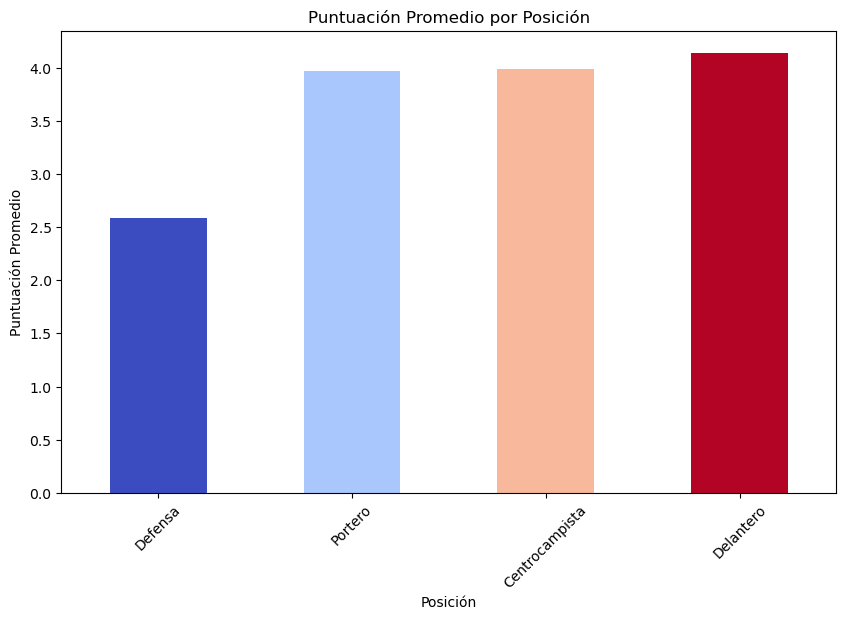

In [4]:
import os
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

# Especifica la ruta de la carpeta que contiene los archivos JSON
carpeta = '../../marca-fantasy-scraper-master/laliga/json_players'

# Lista para almacenar los DataFrames de cada archivo
dataframes = []

# Recorre todos los archivos en la carpeta
for filename in os.listdir(carpeta):
    if filename.endswith('.json'):
        filepath = os.path.join(carpeta, filename)

        # Lee el archivo JSON y normaliza la estructura
        with open(filepath, 'r') as file:
            data = json.load(file)
            df_temp = json_normalize(data)

        # Agrega el DataFrame a la lista
        dataframes.append(df_temp)

# Concatena todos los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)

# Calcula la puntuación promedio por posición
avg_points_by_position = df.groupby('position')['averagePoints'].mean().sort_values()

# Define una lista de colores para las barras
colores = plt.cm.get_cmap("coolwarm", len(avg_points_by_position))

# Visualiza los resultados con un gráfico de barras y asigna colores
plt.figure(figsize=(10, 6))
avg_points_by_position.plot(kind='bar', color=colores(range(len(avg_points_by_position))))
plt.title('Puntuación Promedio por Posición')
plt.xlabel('Posición')
plt.ylabel('Puntuación Promedio')
plt.xticks(rotation=45)
plt.show()


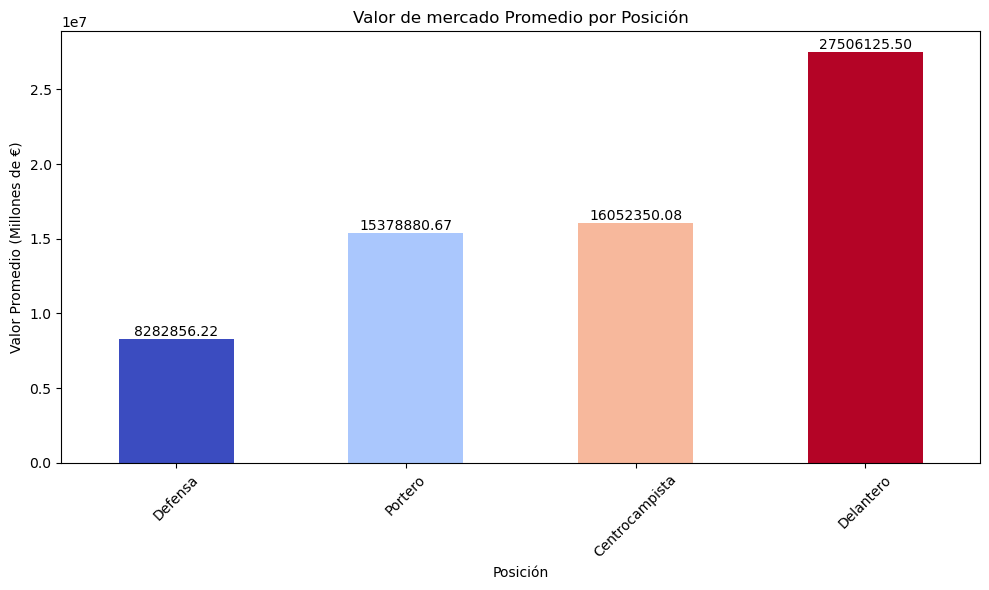

In [5]:
import os
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt

# Especifica la ruta de la carpeta que contiene los archivos JSON
carpeta = '../../marca-fantasy-scraper-master/laliga/json_players'

# Lista para almacenar los DataFrames de cada archivo
dataframes = []

# Recorre todos los archivos en la carpeta
for filename in os.listdir(carpeta):
    if filename.endswith('.json'):
        filepath = os.path.join(carpeta, filename)

        # Lee el archivo JSON y normaliza la estructura
        with open(filepath, 'r') as file:
            data = json.load(file)
            df_temp = json_normalize(data)

        # Agrega el DataFrame a la lista
        dataframes.append(df_temp)

# Concatena todos los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)

# Calcula el valor de mercado promedio por posición
avg_value_by_position = df.groupby('position')['marketValue'].mean().sort_values()

# Define el mapa de colores (puedes cambiar 'coolwarm' por cualquier otro mapa)
cmap = plt.get_cmap("coolwarm", len(avg_value_by_position))

# Genera una lista de colores a partir del mapa
colores = [cmap(i) for i in range(len(avg_value_by_position))]

# Visualiza los resultados con un gráfico de barras y asigna los colores
plt.figure(figsize=(10, 6))
ax = avg_value_by_position.plot(kind='bar', color=colores)

# Añade etiquetas encima de cada barra
for i, value in enumerate(avg_value_by_position):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Configura los títulos y etiquetas
plt.title('Valor de mercado Promedio por Posición')
plt.xlabel('Posición')
plt.ylabel('Valor Promedio (Millones de €)')
plt.xticks(rotation=45)  # Ajusta la rotación de las etiquetas del eje x
plt.tight_layout()  # Ajusta automáticamente los márgenes para evitar cortes

# Muestra el gráfico
plt.show()


In [6]:
import os
import json
import pandas as pd

# Ruta de la carpeta que contiene archivos JSON
ruta_carpeta = "../../marca-fantasy-scraper-master/laliga/json_players"

# Lista para almacenar los datos de cada jugador
jugadores = []

# Iterar sobre cada archivo en la carpeta
for archivo_json in os.listdir(ruta_carpeta):
    # Excluir archivos o carpetas específicas
    if archivo_json == '.ipynb_checkpoints':
        continue

    # Combinar la ruta completa
    ruta_completa = os.path.join(ruta_carpeta, archivo_json)

    # Leer el archivo JSON
    with open(ruta_completa, 'r') as f:
        datos_jugador = json.load(f)

    # Extraer el nombre del jugador y el valor de mercado actual
    nombre_jugador = datos_jugador.get('nickname', 'Desconocido')  # Asignar nombre o 'Desconocido'
    valor_mercado = datos_jugador.get('marketValue', None)  # Extraer marketValue o None

    # Para este caso, asignar directamente el valor de mercado como único dato relevante
    jugadores.append({
        'Nombre': nombre_jugador,
        'ValorMercado': valor_mercado
    })

# Crear un DataFrame a partir de la lista
df = pd.DataFrame(jugadores)

# Ordenar el DataFrame por la columna "ValorMercado" de forma descendente
df = df.sort_values(by='ValorMercado', ascending=False)

# Formatear los valores de mercado con puntos como separador de miles
df['ValorMercado'] = df['ValorMercado'].apply(lambda x: "{:,.0f}".format(x) if pd.notnull(x) else None)

# Reiniciar el índice del DataFrame comenzando desde 1
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1

# Mostrar el DataFrame
df.head(25)



,Nombre,ValorMercado
1,Vinícius Jr,"115,355,760"
2,Griezmann,"106,983,361"
3,Valverde,"101,978,402"
4,Pedri,"82,901,227"
5,Iñaki Williams,"63,182,767"
6,Budimir,"61,576,983"
7,Sancet,"58,859,779"
8,Rodrygo,"58,760,342"
9,Courtois,"53,244,101"
10,Marcos Llorente,"50,339,706"


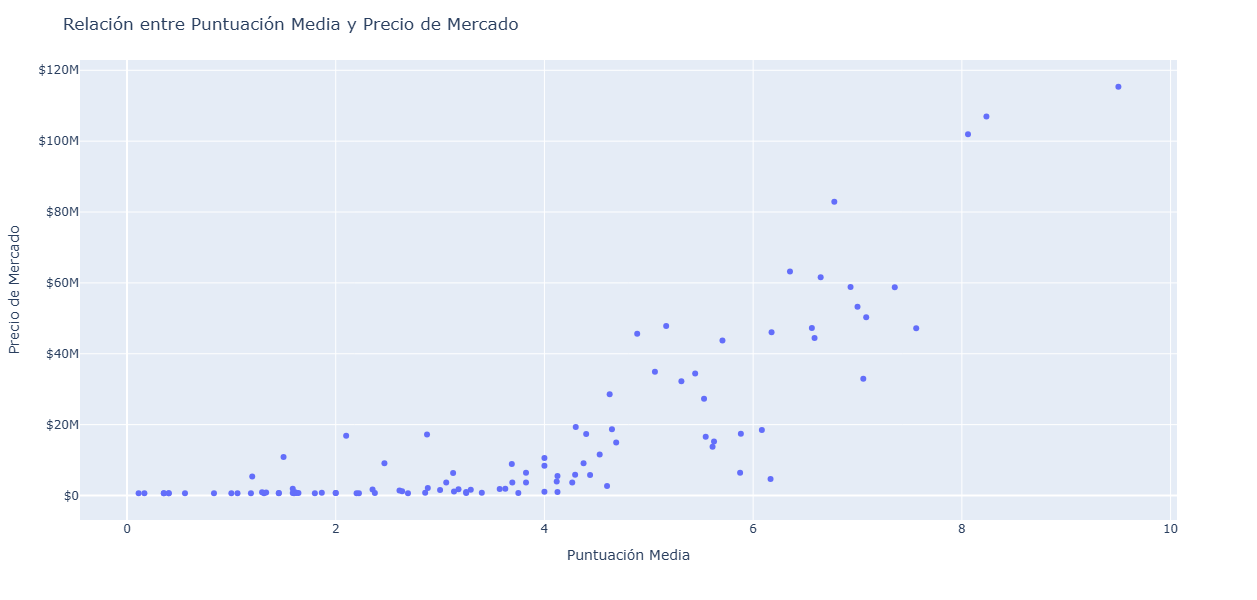

In [7]:
import os
import json
import pandas as pd
import plotly.express as px

# Ruta de la carpeta que contiene archivos JSON
ruta_carpeta = "../../marca-fantasy-scraper-master/laliga/json_players"

# Lista para almacenar los datos de cada jugador
jugadores = []

# Iterar sobre cada archivo en la carpeta
for archivo_json in os.listdir(ruta_carpeta):
    # Excluir archivos o carpetas específicas
    if archivo_json == '.ipynb_checkpoints':
        continue

    # Combinar la ruta completa
    ruta_completa = os.path.join(ruta_carpeta, archivo_json)

    # Leer el archivo JSON
    with open(ruta_completa, 'r') as f:
        datos_jugador = json.load(f)

    # Calcular la puntuación media del jugador
    puntuacion_media = datos_jugador.get('averagePoints', 0)

    # Extraer el nombre del jugador y el valor de mercado
    nombre_jugador = datos_jugador.get('nickname', 'Desconocido')
    ultimo_valor_mercado = datos_jugador.get('marketValue', None)  # Tomar marketValue directamente como valor numérico

    # Agregar los datos a la lista
    jugadores.append({
        'Nombre': nombre_jugador,
        'PuntuacionMedia': puntuacion_media,
        'UltimoValorMercado': ultimo_valor_mercado
    })

# Crear un DataFrame a partir de la lista
df = pd.DataFrame(jugadores)

# Eliminar los jugadores con puntuación media igual a cero
df = df[df['PuntuacionMedia'] > 0]

# Configurar la visualización interactiva con Plotly Express
fig = px.scatter(df,
                 x='PuntuacionMedia',
                 y='UltimoValorMercado',
                 hover_data=['Nombre'])

# Configurar el eje y para que se vea el precio completo
fig.update_yaxes(tickprefix="$")

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Relación entre Puntuación Media y Precio de Mercado',
    xaxis_title='Puntuación Media',
    yaxis_title='Precio de Mercado',
    hovermode='closest',
    width=1000,
    height=600
)

# Mostrar el gráfico interactivo
fig.show()

# Guardar el gráfico interactivo en un archivo HTML
fig.write_html("relacion_puntuacion_precio.html")
